In [34]:
import pandas as pd
teams = pd.read_csv('teams.csv')


In [35]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [36]:
teams = teams[["team","country","athletes","year","events","age","prev_medals","medals"]]
teams

,team,country,athletes,year,events,age,prev_medals,medals
0,AFG,Afghanistan,8,1964,8,22.0,0.0,0
1,AFG,Afghanistan,5,1968,5,23.2,0.0,0
2,AFG,Afghanistan,8,1972,8,29.0,0.0,0
3,AFG,Afghanistan,11,1980,11,23.6,0.0,0
4,AFG,Afghanistan,5,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,26,2000,19,25.0,0.0,0
2140,ZIM,Zimbabwe,14,2004,11,25.1,0.0,3
2141,ZIM,Zimbabwe,16,2008,15,26.1,3.0,4
2142,ZIM,Zimbabwe,9,2012,8,27.3,4.0,0


In [39]:
teams.corr()["medals"]

athletes       0.840817
year          -0.021603
events         0.771330
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [40]:
import seaborn as sns

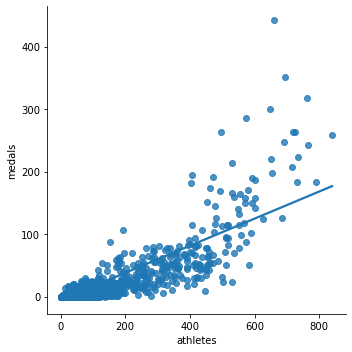

In [41]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True,ci=None)

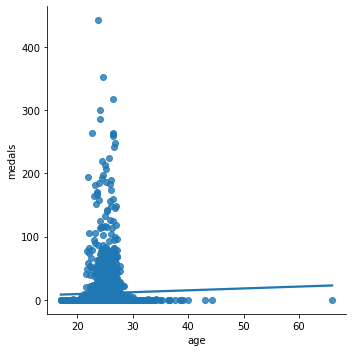

In [42]:
sns.lmplot(x='age',y='medals',data=teams,fit_reg=True,ci=None)

<AxesSubplot:ylabel='Frequency'>

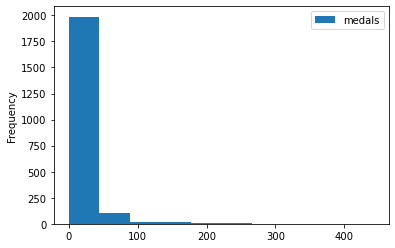

In [43]:
teams.plot.hist(y='medals')

In [44]:
teams[teams.isnull().any(axis=1)]

,team,country,athletes,year,events,age,prev_medals,medals
19,ALB,Albania,9,1992,8,25.3,NaN,0
26,ALG,Algeria,7,1964,7,26.0,NaN,0
39,AND,Andorra,3,1976,2,28.3,NaN,0
50,ANG,Angola,17,1980,14,17.4,NaN,0
59,ANT,Antigua and Barbuda,17,1976,11,23.2,NaN,0
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,6,1988,6,20.5,NaN,0
2103,YAR,North Yemen,3,1984,3,27.7,NaN,0
2105,YEM,Yemen,8,1992,8,19.6,NaN,0
2112,YMD,South Yemen,5,1988,5,23.6,NaN,0


In [45]:
teams = teams.dropna()

In [46]:
teams

,team,country,athletes,year,events,age,prev_medals,medals
0,AFG,Afghanistan,8,1964,8,22.0,0.0,0
1,AFG,Afghanistan,5,1968,5,23.2,0.0,0
2,AFG,Afghanistan,8,1972,8,29.0,0.0,0
3,AFG,Afghanistan,11,1980,11,23.6,0.0,0
4,AFG,Afghanistan,5,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,26,2000,19,25.0,0.0,0
2140,ZIM,Zimbabwe,14,2004,11,25.1,0.0,3
2141,ZIM,Zimbabwe,16,2008,15,26.1,3.0,4
2142,ZIM,Zimbabwe,9,2012,8,27.3,4.0,0


In [49]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression()

In [53]:
predictors = ["athletes", "prev_medals"]
target = ["medals"]
reg.fit(train[predictors],train[target])

LinearRegression()

In [55]:
predictions = reg.predict(test[predictors])

In [56]:
predictions

array([[-9.61221245e-01],
       [-1.17633261e+00],
       [-1.42503158e+00],
       [-1.71184673e+00],
       [ 2.15562926e+00],
       [ 3.91463636e+00],
       [-1.71184673e+00],
       [-1.85525431e+00],
       [ 3.67563128e-01],
       [-2.77770967e-01],
       [-1.85525431e+00],
       [-1.49673537e+00],
       [ 4.67519911e+01],
       [ 2.87550937e+01],
       [ 4.58450091e+00],
       [ 2.54773581e+00],
       [-1.85525431e+00],
       [-1.64014295e+00],
       [-1.85525431e+00],
       [-1.85525431e+00],
       [ 1.46556876e+02],
       [ 1.20571799e+02],
       [ 6.56314795e+00],
       [ 3.95275254e+00],
       [ 7.34283247e+00],
       [ 1.03117468e+01],
       [ 5.19171882e+00],
       [ 3.58517645e+00],
       [-1.64014295e+00],
       [-1.64014295e+00],
       [-1.56843916e+00],
       [-1.20992022e+00],
       [-1.71184673e+00],
       [-1.42503158e+00],
       [ 1.17929959e+01],
       [ 1.00049298e+01],
       [-1.78355052e+00],
       [-1.71184673e+00],
       [-1.5

In [57]:
test["predictions"] = predictions

In [67]:
test

,team,country,athletes,year,events,age,prev_medals,medals,predictions,prediction
6,AFG,Afghanistan,6,2012,6,24.8,1.0,1,0.000000,0.0
7,AFG,Afghanistan,3,2016,3,24.7,1.0,0,0.000000,0.0
24,ALB,Albania,10,2012,9,25.7,0.0,0,0.000000,0.0
25,ALB,Albania,6,2016,6,23.7,0.0,0,0.000000,0.0
37,ALG,Algeria,39,2012,29,24.8,2.0,1,2.155629,2.0
...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,3,2016,3,19.3,0.0,0,0.000000,0.0
2131,ZAM,Zambia,7,2012,7,22.6,0.0,0,0.000000,0.0
2132,ZAM,Zambia,7,2016,7,24.1,0.0,0,0.000000,0.0
2142,ZIM,Zimbabwe,9,2012,8,27.3,4.0,0,1.505767,2.0


In [63]:
test.loc[test["predictions"] < 0 , "predictions"] = 0

In [64]:
test

,team,country,athletes,year,events,age,prev_medals,medals,predictions
6,AFG,Afghanistan,6,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,3,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,10,2012,9,25.7,0.0,0,0.000000
25,ALB,Albania,6,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,39,2012,29,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,3,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,7,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,7,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,9,2012,8,27.3,4.0,0,1.505767


In [65]:
test["prediction"] = test["predictions"].round()

In [66]:
test

,team,country,athletes,year,events,age,prev_medals,medals,predictions,prediction
6,AFG,Afghanistan,6,2012,6,24.8,1.0,1,0.000000,0.0
7,AFG,Afghanistan,3,2016,3,24.7,1.0,0,0.000000,0.0
24,ALB,Albania,10,2012,9,25.7,0.0,0,0.000000,0.0
25,ALB,Albania,6,2016,6,23.7,0.0,0,0.000000,0.0
37,ALG,Algeria,39,2012,29,24.8,2.0,1,2.155629,2.0
...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,3,2016,3,19.3,0.0,0,0.000000,0.0
2131,ZAM,Zambia,7,2012,7,22.6,0.0,0,0.000000,0.0
2132,ZAM,Zambia,7,2016,7,24.1,0.0,0,0.000000,0.0
2142,ZIM,Zimbabwe,9,2012,8,27.3,4.0,0,1.505767,2.0
